# Tarea 1. Oscilador paramétrico no lineal.

Verificar numéricamente la inestabilidad que se menciona en la figura 32, respecto a la curva de resonancia no lineal.

La ecuación diferencial que rige el fenómeno es

\begin{equation}
    \ddot x + 2\lambda\dot x+\omega_0^2x=\frac{f}{m} cos (\gamma t) - \alpha x^2-\beta x^3
\end{equation}

y se analiza el caso particular en el que $\gamma=\omega_0+\epsilon$


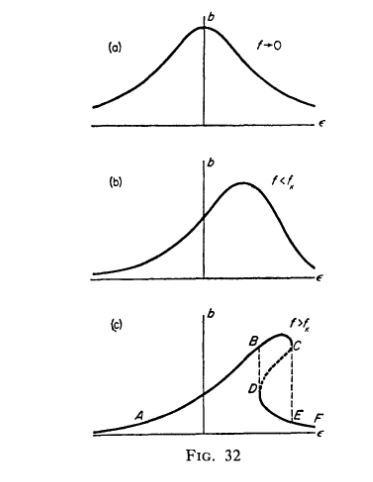

A continuación, está el código que ayuda al análisis del problema. En él se soluciona la ecuación diferencial haciendo uso de la función odeint de la librería Scipy, dando como resultado datos de la posición para la partícula que oscila en el tiempo. Para poder verificar que se da la histéresis y que el sistema es inestable en la curva CD, introducimos una variación en la frecuencia de la fuerza forzante, la cual es dependiente de forma lineal del tiempo, y es mucho menor que la frecuencia natural.

Se modeló la variación ($\epsilon$) de la frecuencia como una ecuación de la forma $\epsilon=at+d$, donde $d$ es la variación inicial y $a$ se tomó como $0.01$, de tal manera que la variación de la frecuencia en un período es lo suficientemente pequeña para asumir que en ese intervalo de tiempo la amplitud es constante y así poderse medir. En el código, la amplitud se mide tomando cada uno de los máximos relativos, y se relaciona con el $\epsilon$ en ese punto.

De tal manera, se presentan gráficas de la posición del oscilador en función del tiempo y de la amplitud en función del $\epsilon$, tanto para un $\epsilon$ creciente como para uno decreciente, con un $\epsilon$ inicial en una zona estable (en AC o DF), y con un $\epsilon$ en una zona inestable (en la curva CD). El objetivo de todas las gráficas es comparar cómo se comporta en las zonas estables, y ver que en la zona de inestabilidad decae rápidamente a alguna de las trayectorias estables.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#Función para determinar la fuerza crítca en la cual existe la curva CD como se presenta en la fig 32
fk=lambda m,w,l,b,a: (32*(m**2)*(w**2)*(l**3)/(3*(3**0.5)*abs(3*b/(8*w)-5*a**2/(12*w**2))))**0.5


#Función que ayuda a hacer todas las gráficas. Creditos: Jhossua
def Plot(ax,x,y,legend="",title="",tsize=12,xlabel="",xsize=10,ylabel="",ysize=10,tipo=".",ms=0.5):
    
    ax.plot(x,y,tipo,markersize=ms)
    ax.set_title(title,fontsize=tsize)
    ax.set_xlabel(xlabel,fontsize=xsize)
    ax.set_ylabel(ylabel,fontsize=ysize)
    ax.grid()

#Función para resolver la ED y graficar las soluciones
def Parametrico(Y0,C,T,ine,ph):
    #Y0: condiciones iniciales. Lista [x,v]
    #C lista de constantes de la ED. C=[l,w,f,m,a,b,ec,d]
   
    
    l=C[0]
    w=C[1]
    f=C[2]
    m=C[3]
    a=C[4]
    b=C[5]
    
    
    
     #Epsilon inicial
        
    #Ecuación diferencial. Procedimiento usual
    def func(Y,t,ec,d):
        x,v=Y
        dx=v
        dv=-2*l*v-(w**2)*x+(f/m)*np.cos((w+ec*t+d)*t)-a*x**2-b*x**3
        return np.array([dx,dv])

    #Solución para caso estable, epsilon creciente
    sol1=odeint(func,Y0,T,args=(C[6],C[7]))
    x1=sol1[:,0]
    
    #Para caso estable, epsilon decreciente. ph se usa para indicar en que epsilon inicia respecto al otro
    sol2=odeint(func,Y0,T,args=(-C[6],C[7]+ph))
    x2=sol2[:,0]
    
    #Para caso inestable, creciente. ine marca cuál el epsilon inestable que se toma
    sol3=odeint(func,Y0,T,args=(C[6],ine))
    x3=sol3[:,0]
    
    #Para caso inestable, decreciente
    sol4=odeint(func,Y0,T,args=(-C[6],ine))
    x4=sol4[:,0]

    
    Xmax1=[] #Corresponde con la posición de la amplitud (máximos)
    Xmax2=[]
    Xmax3=[]
    Xmax4=[]

    """Iteraciones para hallar los máximos: la función es "bien comportada"
    por lo que todos los máximos cumplen que son mayores que el valor anterior
    y que el valor que les sigue"""
    
    for i in range(1,len(x1)-1):
        if x1[i]>x1[i-1] and x1[i]>x1[i+1]:
            Xmax1.append(i)

    for i in range(1,len(x2)-1):
        if x2[i]>x2[i-1] and x2[i]>x2[i+1]:
            Xmax2.append(i)

    for i in range(1,len(x3)-1):
        if x3[i]>x3[i-1] and x3[i]>x3[i+1]:
            Xmax3.append(i)

    for i in range(1,len(x4)-1):
        if x4[i]>x4[i-1] and x4[i]>x4[i+1]:
            Xmax4.append(i)

    Amp1=x1[Xmax1]
    Amp2=x2[Xmax2]
    Amp3=x3[Xmax3]
    Amp4=x4[Xmax4]

    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (16,16))

    Plot(ax1,T,x1,"Leyenda1","Oscilaciones con $\epsilon$ creciente",12,"Tiempo [s]",10,"Posición [m]",10)
    Plot(ax2,T,x2,"Leyenda1","Oscilaciones con $\epsilon$ decreciente",12,"Tiempo [s]",10,"Posición [m]",10)
    Plot(ax3,T,x3,"Leyenda1","Oscilaciones con $\epsilon$ creciente en zona de inestabilidad",12,"Tiempo [s]",10,"Posición [m]",10)
    Plot(ax4,T,x4,"Leyenda1","Oscilaciones con $\epsilon$ decreciente en zona de inestabilidad",12,"Tiempo [s]",10,"Posición [m]",10)
  
    fig, ((ax5,ax6),(ax7,ax8)) = plt.subplots(2,2, figsize = (16,16))

    Plot(ax5,C[6]*T[Xmax1]+C[7],Amp1,"Leyenda1","Amplitud con $\epsilon$ creciente",12,"$\epsilon$ [m]",10,"Amplitud [m]",10)
    Plot(ax6,-C[6]*T[Xmax2]+C[7]+ph,Amp2,"Leyenda1","Amplitud con $\epsilon$ decreciente",12,"$\epsilon$ [m]",10,"Amplitud [m]",10)
    Plot(ax7,C[6]*T[Xmax3]+ine,Amp3,"Leyenda1","Amplitud con $\epsilon$ creciente en zona de inestabilidad",12,"$\epsilon$ [m]",10,"Amplitud [m]",10)
    Plot(ax8,-C[6]*T[Xmax4]+ine,Amp4,"Leyenda1","Amplitud con $\epsilon$ decreciente en zona de inestabilidad",12,"$\epsilon$ [m]",10,"Amplitud [m]",10)


    print("El valor crítico para la fuerza es %.2f"%fk(m,w,l,b,a))

El valor crítico para la fuerza es 372.97


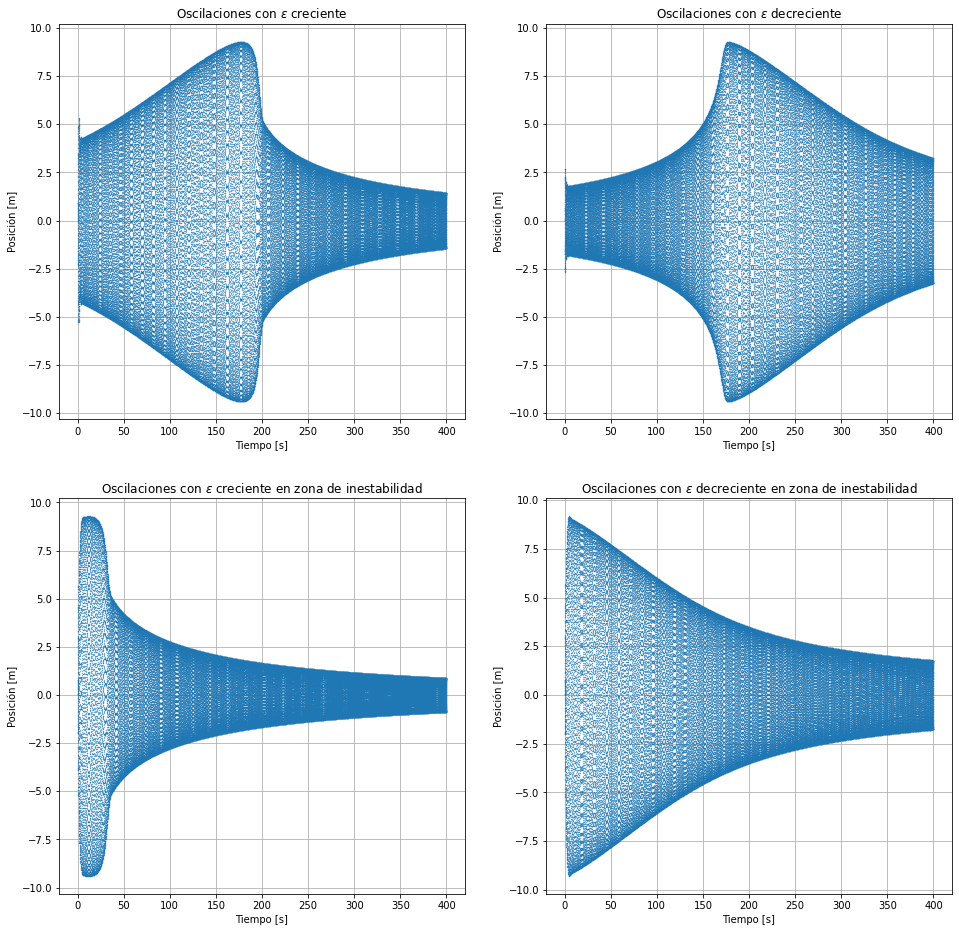

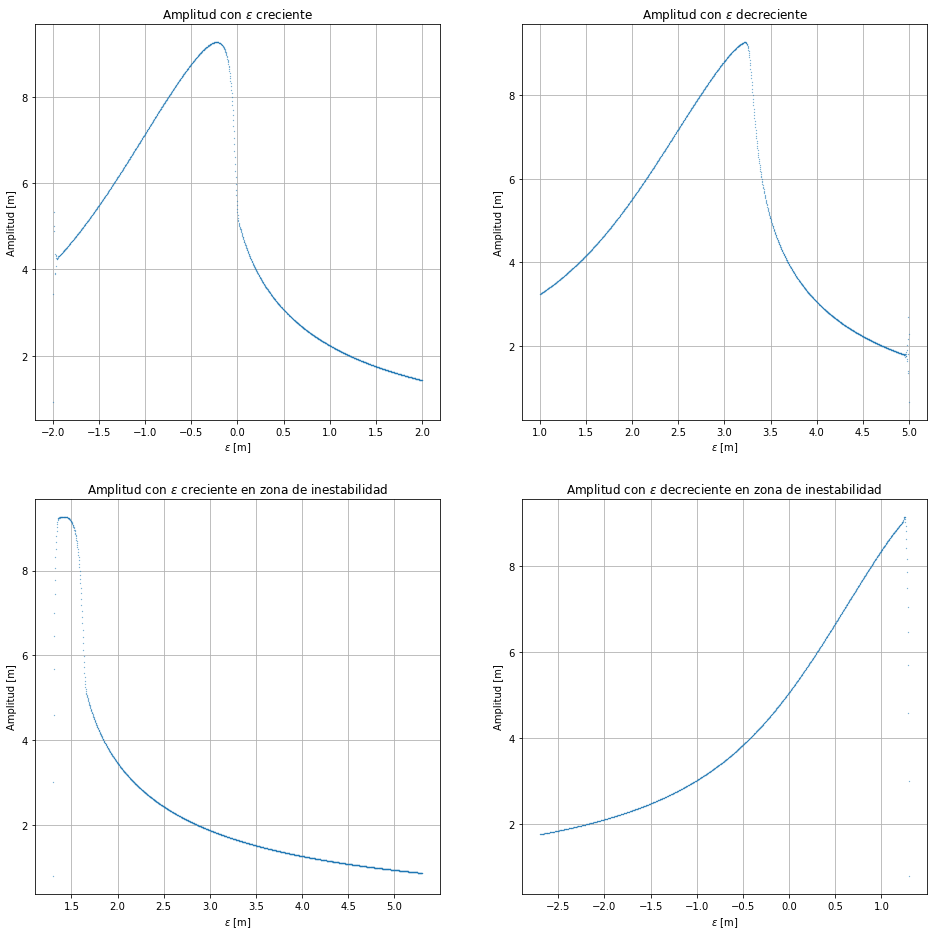

In [5]:
Parametrico([0,0],[1,20,400,1,1,1,0.01,-2],np.linspace(0,400,100000),1.3,7)

En las dos primeras gráficas observamos que ellas no son simétricas, por lo tanto la trayectoria que sigue depende de su evolución temporal, lo cual es un resultado esperado de acuerdo a lo analizado en el capítulo de Landau. En la primera gráfica, observamos que la amplitud es máxima entre 150 y 200 segundos, y luego de llegar al pico decrece súbitamente. En la segunda gráfica se observa que primero aumenta levemente, y alrededor de los 150 segundos, la pendiente de la amplitud crece considerablemente.

En las gráficas que inician en la zona de inestabilidad, vemos que luego de la transiente lucen como una sección de las gráficas estables presentadas anteriormente, esto quiere decir que al introducir la pequeña perturbación decaen rápidamente a un estado estable.

Las gráficas de amplitud vs $\epsilon$ presentan un comportamiento como el mostrado en la fig. 32 de Landau, con la excepción de que en el punto de corte la línea no es completamente vertical, pero si tiene una pendiente bastante inclinada, lo cual tiene sentido, ya que la transición no puede ser instantánea, sino que se tiene que dar en un breve tiempo.

En la primera gráfica de inestabilidad, se inicia con una amplitud baja que crece rápidamente, lo cual corresponde con la transición de un punto en CD hacia B (no atribuible a la transiente pues la amplitud es muy grande), luego crece levemente y vuelve a decrecer hacia el punto C, para finalmente "saltar" al punto E y seguir hacia F, con lo que vemos que con una pequeña variación terminó en una trayectoria estable.

En la segunda gráfica de inestabilidad, se da el caso análogo al del gráfico anterior: se da una rápida transición de un punto de la curva CD hacia B, y finalmente decrece siguiendo el camino hacia A.

Así, tenemos que los puntos en la curva CD son inestables, y las pequeñas variaciones hacen que las oscilaciones decaigan a trayectorias estables.

El valor crítico para la fuerza es 137.47


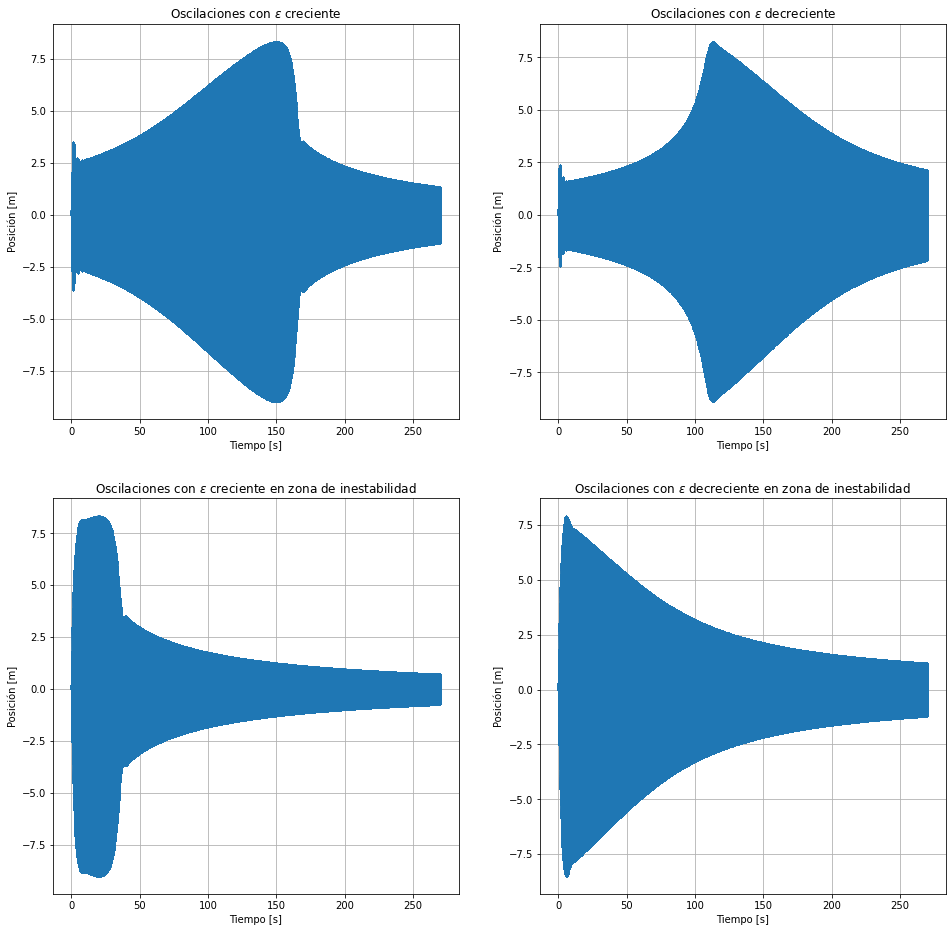

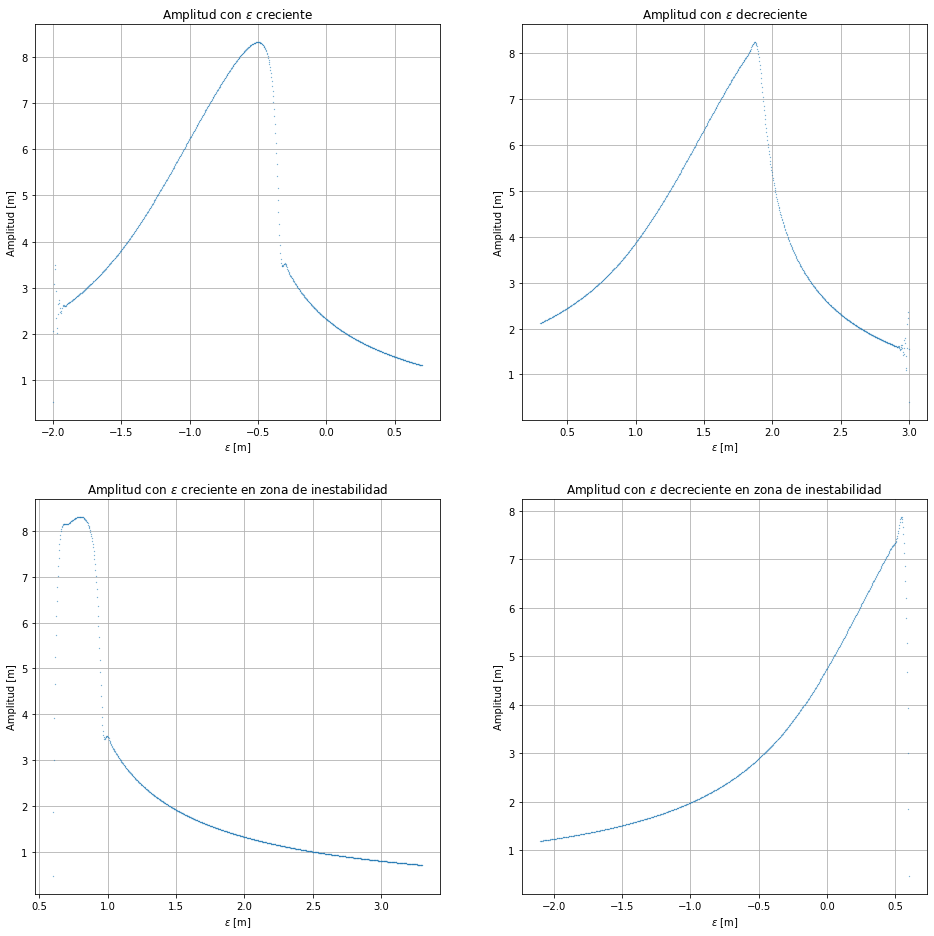

In [2]:
Parametrico([0,0],[0.55,18,180,1,5,0.7,0.01,-2],np.linspace(0,270,5000000),0.6,5)

El análisis es análogo al anterior. En la primera gráfica de amplitud en zona de inestabilidad observamos que crece súbitamente la amplitud inicial hasta lo que correspondería al punto B, y sigue la misma trayectoria que en el primer caso de inestabilidad del ejemplo anterior. De la misma manera, sucede lo mismo que en el ejemplo anterior para la segunda gráfica, i.e, el sistema decae rápidamente a una trayectoria estable para una pequeña variación en la zona de inestabilidad.

A diferencia del caso anterior, vemos que hay un pequeño pico luego de las subidas y las bajadas súbitas, las cuales probablemente se atribuyan a errores en el cálculo numérico que deberían de desaparecer al aumentar la cantidad de puntos (no se puede ejecutar debido a que es demasiado exigente). Creemos esto ya que vimos el mismo comportamiento en el caso anterior cuando se tomaba una menor densidad de puntos.